## __Exploratory Data Analysis__

In [53]:
## importing libraries

import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data')
data_file = os.path.join(data_folder, 'MMR_DATA.csv')
df = pd.read_csv(data_file)
df.head()

,row,col,latitude,longitude,Map Data
0,0,0,18.89433,72.784597,NaN
1,0,1,18.89433,72.794102,Prongs Reef is a Natural;
2,0,2,18.89433,72.803607,United Services Club Golf Course is a Leisure ...
3,0,3,18.89433,72.813112,Indian Meterological Department is a Commercia...
4,0,4,18.89433,72.822617,NaN


In [7]:
## filling the NaN values in the Map Data Column with empty string

df['Map Data'] = df['Map Data'].fillna('')
df.head()

,row,col,latitude,longitude,Map Data
0,0,0,18.89433,72.784597,
1,0,1,18.89433,72.794102,Prongs Reef is a Natural;
2,0,2,18.89433,72.803607,United Services Club Golf Course is a Leisure ...
3,0,3,18.89433,72.813112,Indian Meterological Department is a Commercia...
4,0,4,18.89433,72.822617,


In [20]:
len(df)

1225

In [42]:
df_len_explore = df.copy()

In [43]:
## dropping the columns that are not needed for the analysis

df_len_explore = df_len_explore.drop(columns=['row', 'col', 'latitude', 'longitude'])
df_len_explore.head()

,Map Data
0,
1,Prongs Reef is a Natural;
2,United Services Club Golf Course is a Leisure ...
3,Indian Meterological Department is a Commercia...
4,


In [44]:
## dropping the rows with 0 string length and string length > 5000

df_len_explore = df_len_explore[df_len_explore['Map Data'].str.len() > 0]
df_len_explore = df_len_explore[df_len_explore['Map Data'].str.len() < 5000]
len(df_len_explore)

791

In [45]:
print('Discarded rows: ', len(df) - len(df_len_explore), '/', len(df))

Discarded rows:  434 / 1225


In [52]:
## mean of the string length

print('Mean string length: ', df_len_explore['Map Data'].str.len().mean())
print('80th  percentile string length: ', df_len_explore['Map Data'].str.len().quantile(0.8))

Mean string length:  834.7509481668774
80th  percentile string length:  1560.0


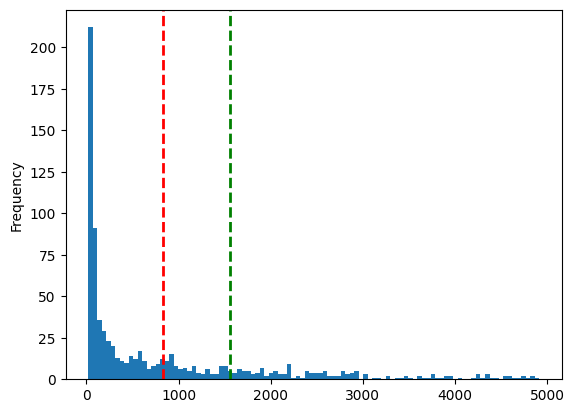

In [51]:
## plotting lenth of strings in the Map Data Column, mean and 75th percentile

df_len_explore['Map Data'].str.len().plot(kind='hist', bins=100)
plt.axvline(df_len_explore['Map Data'].str.len().mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_len_explore['Map Data'].str.len().quantile(0.80), color='green', linestyle='dashed', linewidth=2)

### Same visualization, post cleaning

In [54]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\Akhil
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akhil
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
## cleaning the strings, stemming and lemmatizing

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = [word for word in text.split() if word not in stop_words]
    text = [stemmer.stem(word) for word in text] 
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

df_len_explore['Map Data'] = df_len_explore['Map Data'].apply(clean_text)

In [56]:
print('Mean string length: ', df_len_explore['Map Data'].str.len().mean())
print('80th  percentile string length: ', df_len_explore['Map Data'].str.len().quantile(0.8))

Mean string length:  596.3046776232617
80th  percentile string length:  1114.0


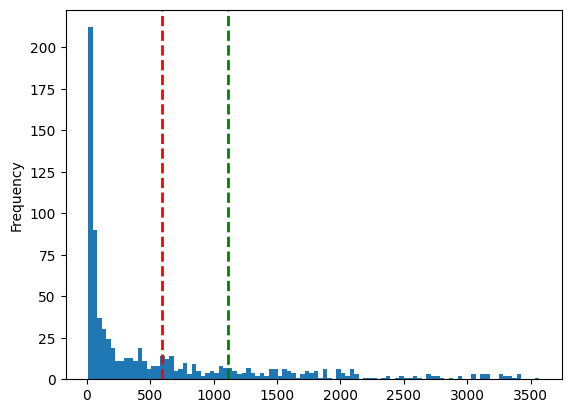

In [57]:
df_len_explore['Map Data'].str.len().plot(kind='hist', bins=100)
plt.axvline(df_len_explore['Map Data'].str.len().mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_len_explore['Map Data'].str.len().quantile(0.80), color='green', linestyle='dashed', linewidth=2)

In [59]:
## Final Summary

print('Original data length:                    ', len(df))
print('Number of blanks:                        ', len(df) - len(df[df['Map Data'].str.len() > 0]))
print('Number of strings with length > 5000:    ', len(df[df['Map Data'].str.len() > 5000]))
print('Number of useful rows:                   ', len(df_len_explore))

Original data length:                     1225
Number of blanks:                         407
Number of strings with length > 5000:     27
Number of useful rows:                    791


In [62]:
print('Post cleaning data length:       ', len(df_len_explore))
print('Avg string length:               ', df_len_explore['Map Data'].str.len().mean())
print('Median string length:            ', df_len_explore['Map Data'].str.len().median())
print('25th percentile string length:   ', df_len_explore['Map Data'].str.len().quantile(0.25))   
print('80th percentile string length:   ', df_len_explore['Map Data'].str.len().quantile(0.8))

Post cleaning data length:        791
Avg string length:                596.3046776232617
Median string length:             192.0
25th percentile string length:    43.5
80th percentile string length:    1114.0


Highly uneven string length distribution.
- 33% of the total data is useless, ie. blank rows
- 25% of the strings have length less than 45 characters
- 50% of the strings have length less than 200 characters
- 30% of the strings have length between 200 - 1100 characters (huge variation)
- 20% of the strings have length greater than 1100 characters
- about 5% of strings are longer than 5000 characters (wont be used in training)

In [ ]:
## function to clean the given data frame

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = [word for word in text.split() if word not in stop_words]
    text = [stemmer.stem(word) for word in text] 
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

def clean_data(df):
    df['Map Data'] = df['Map Data'].fillna('')
    df = df[df['Map Data'].str.len() > 0]
    df = df[df['Map Data'].str.len() < 5000]
    df['Map Data'] = df['Map Data'].apply(clean_text)
    return df